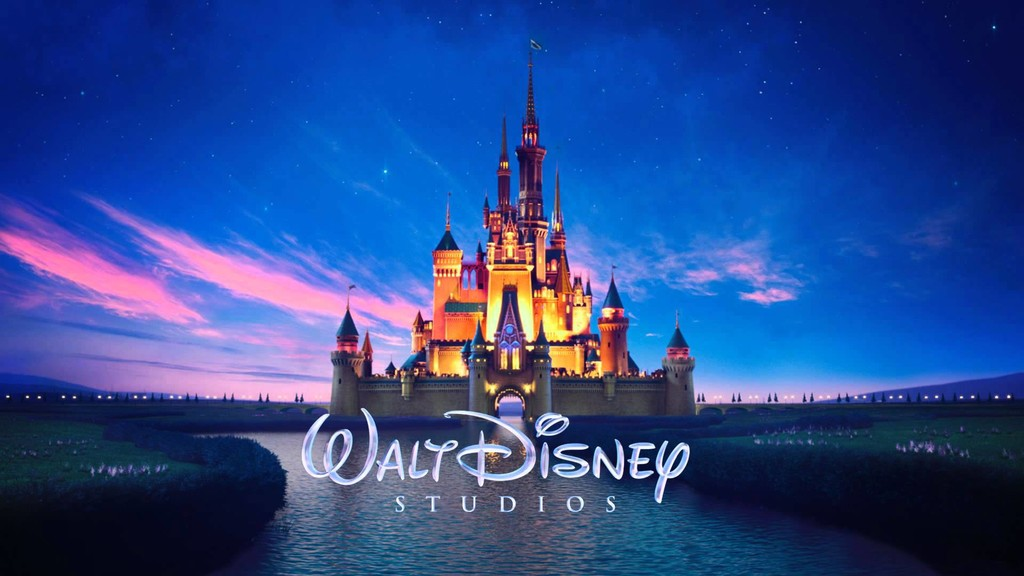

# INTRODUCCIÓN

Este cuaderno está diseñado para realizar un Análisis Exploratorio de Datos (EDA) y generar insights narrativos sobre el conjunto de datos de ingresos brutos de películas de Disney.
Exploraremos las tendencias clave en el rendimiento de las películas de Disney, analizando cómo factores como el género y la calificación influyen en su éxito en taquilla. Además, se identificarán patrones relevantes que podrían ayudar a comprender mejor la relación entre las características de las películas y su desempeño financiero.

**Descripción de la variable**

*   movie_title: Titulo de la película
*   release_date: Fecha de estreno de la película
*   genre: género de la película
*   mpaa_rating: Clasificación de la película según el sistema de clasificación de películas de la Motion Picture Association
*   total_gross: Total bruto de la película
*   inflation_adjusted_gross: Se refiere al total bruto de la película después de la inflación, por lo que las películas antiguas tienen un valor mayor

**Exportaciones**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

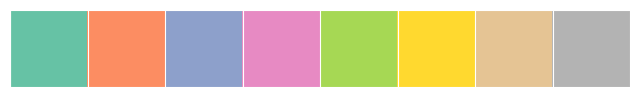

In [28]:
color_pallet = sns.color_palette(palette='Set2')
sns.palplot(color_pallet)
plt.show()

**EDA**

In [10]:
df = pd.read_csv('/content/disney_movies_total_gross.csv')

In [11]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


El conjunto de datos contiene algunos valores nulos en género y mpaa_rating que voy a completar como 'NaN'

In [13]:
df = df.fillna("NaN")

**Temporal Analysis**

Convertimos la variable release_date a datetime

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])

Usando release_date, crearemos otra variable, década, que muestra cómo cambiaron las tendencias de las películas de Disney a lo largo de las décadas.

In [15]:
lis=[]
for i in range(579):
    if df['release_date'][i].year > 2010:
        lis.append('2010-2020')
    elif df['release_date'][i].year <= 2010 and df['release_date'][i].year > 2000:
        lis.append('2000-2010')
    elif df['release_date'][i].year <= 2000 and df['release_date'][i].year > 1990:
        lis.append('1990-2000')
    elif df['release_date'][i].year <= 1990 and df['release_date'][i].year > 1980:
        lis.append('1980-1990')
    elif df['release_date'][i].year <= 1980 and df['release_date'][i].year > 1970:
        lis.append('1970-1980')
    elif df['release_date'][i].year <= 1970 and df['release_date'][i].year > 1960:
        lis.append('1960-1970')
    elif df['release_date'][i].year <= 1960 and df['release_date'][i].year > 1950:
        lis.append('1950-1960')
    else:
        lis.append('<1950')
df['decade'] = lis

In [16]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020




> Nota: Cada película estrenada antes de 1950 está en una categoría y la categoría 2010-2020 solo contiene películas estrenadas hasta 2016



**Visualización de tendencias utilizando la variable release_date**

In [18]:
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='¿Qué género ha recaudado más a lo largo de los años?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

📌 La primera película producida por Disney fue un musical, el clásico 'Blancanieves y los siete enanitos'.

📌 La frecuencia de las películas aumenta considerablemente a lo largo de las décadas.

📌 Los ingresos brutos de las películas muestran un crecimiento exponencial, alcanzando sus picos más altos después del 2000.

📌 La popularidad de los géneros cambió con el tiempo: musicales dominaron antes de 1960, mientras que aventura y acción lideran desde 1990.

📌 Desde 1990, se observa una mayor diversidad de géneros, en contraste con las décadas anteriores, que estaban dominadas por unos pocos géneros.

📌 Las producciones de alto presupuesto después del 2000 han generado los mayores ingresos brutos, destacando el impacto de franquicias y éxitos recientes.

📌 La variable de la década permite un análisis más profundo sobre cómo cambiaron las tendencias de géneros y recaudación a lo largo del tiempo.

In [19]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='¿Qué género recaudó más después de la inflación a lo largo de los años?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

📌 Con el ajuste por inflación, los ingresos de las películas clásicas se incrementaron notablemente, posicionando a 'Blancanieves y los siete enanitos' como la producción más valiosa de Disney en términos de recaudación, superando incluso a Avengers: Endgame.

📌 Las películas anteriores a 1960, como los musicales, dominan los ingresos ajustados por inflación, destacándose por ser clásicos duraderos.

📌 Desde 1990, los géneros de acción y aventura comenzaron a liderar los ingresos brutos ajustados por inflación, mostrando un cambio en las preferencias del público.

📌 Aunque el número de películas producidas creció con los años, los ingresos ajustados por inflación de las películas más recientes son más consistentes pero no alcanzan los niveles de clásicos como Blancanieves.

📌 Los géneros musicales y de aventuras generaron los picos más altos en ingresos ajustados, destacándose en diferentes períodos de tiempo.

📌 En las décadas recientes, aunque se observa mayor diversidad de géneros, ninguno logra los niveles de ingresos ajustados alcanzados por los grandes clásicos de Disney.

📌 Este análisis resalta cómo las películas históricas siguen siendo económicamente relevantes debido al ajuste por inflación, subrayando el impacto de producciones de la época dorada de Disney.



In [20]:
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='¿Qué película clasificada por la MPAA recaudó más a lo largo de los años?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

In [21]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='¿Qué película clasificada por la MPAA recaudó más después de la inflación a lo largo de los años?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()



> **Observaciones**

📌Podemos ver tendencias similares en la clasificación de la MPAA: las primeras películas de Disney solían tener clasificación G, pero las más recientes tienen en su mayoría clasificación PG y PG-13.

📌Debido a la inflación en los ingresos brutos de las películas, las primeras películas que tenían clasificación G recaudaron más que las películas actuales con clasificación PG o PG-13.



Utilizamos la variable Década para realizar un análisis de tendencias más detallado.

<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-25309a9b3174>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

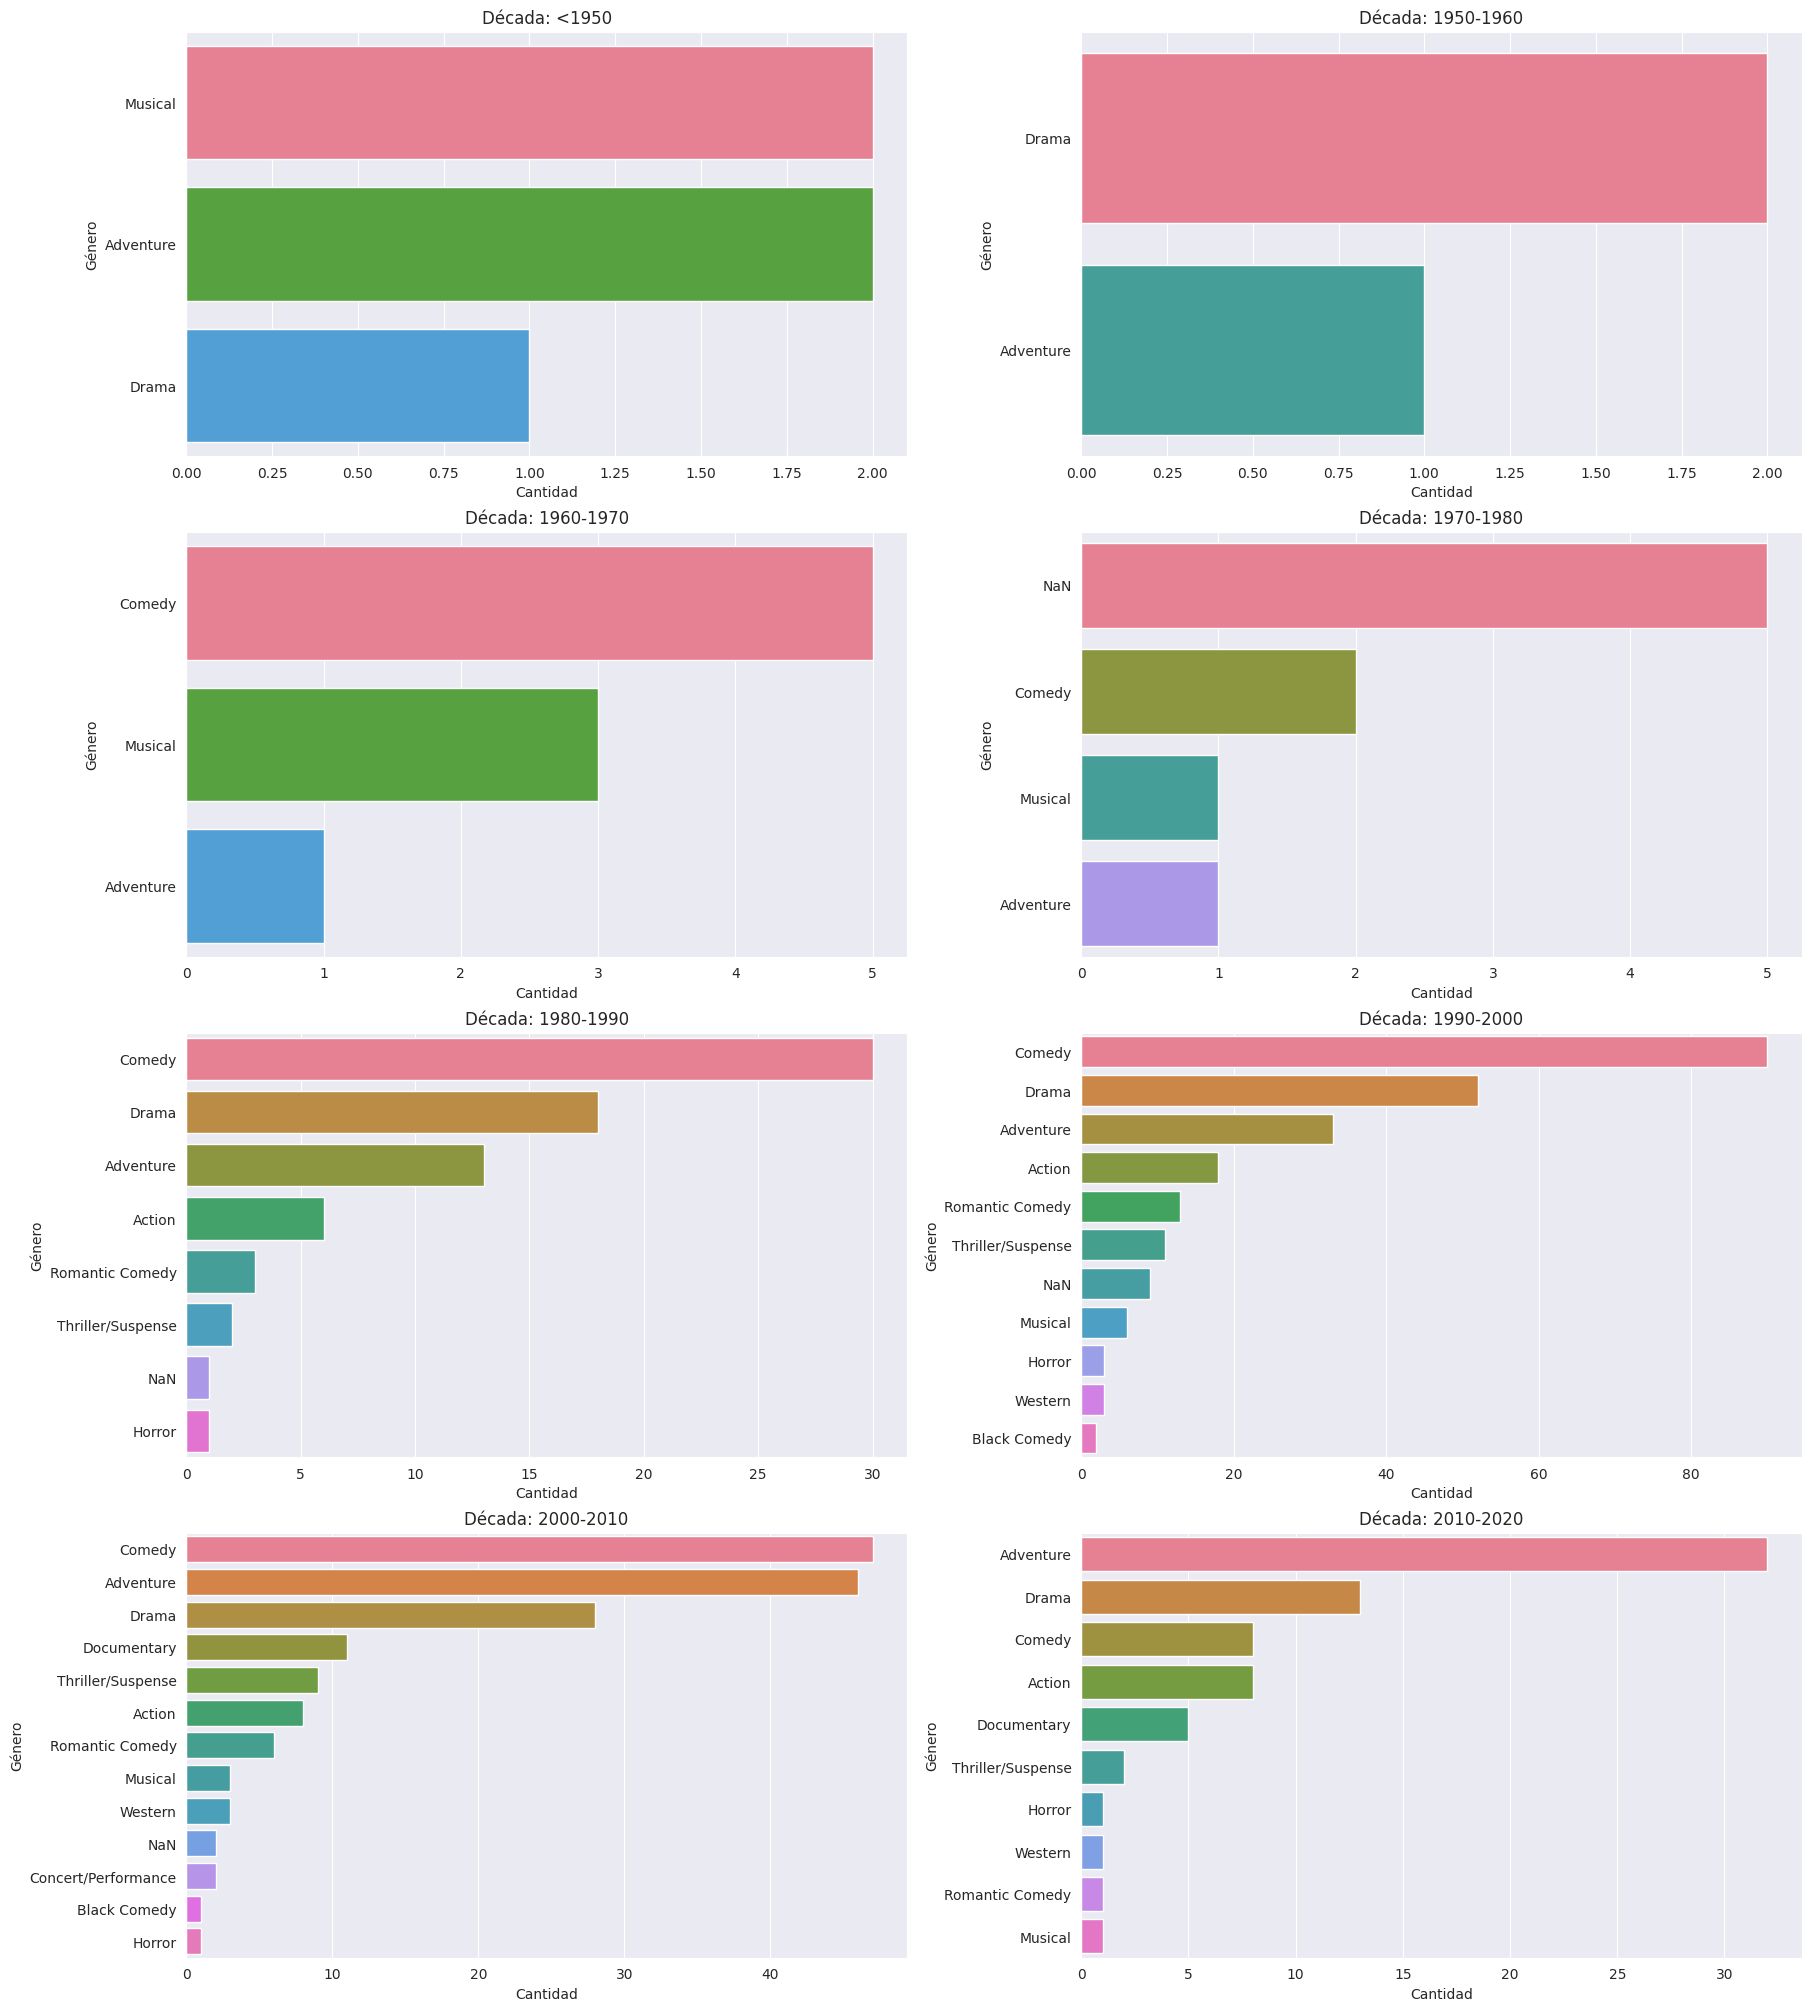

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

decade_lis = df['decade'].unique()
sns.set_style('darkgrid')
rows = -(-len(decade_lis) // 2)
fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten() if rows > 1 else [axes]
for i, decade in enumerate(decade_lis):
    ax = axes[i]
    palette = sns.color_palette("husl", len(df[df['decade'] == decade]['genre'].unique()))
    sns.countplot(
        y='genre',
        data=df[df['decade'] == decade],
        ax=ax,
        order=df[df['decade'] == decade]['genre'].value_counts().index,
        palette=palette
    ).set(title=f'Década: {decade}', xlabel='Cantidad', ylabel='Género')
for ax in axes[len(decade_lis):]:
    ax.remove()
plt.show()



> Observaciones

📌Podemos ver que en diferentes décadas Disney se centró en hacer películas de diferentes géneros.

📌De 1980 a 2010 se centraron principalmente en películas de comedia, aunque las películas de aventuras tuvieron un rendimiento mucho mejor a partir de 2010, observaron este punto y comenzaron a centrarse más en el género de aventuras.



Usamos movie_title para clasificar películas según su franquicia

In [32]:
movies_francise_list = []
lis = df['movie_title']
for i in lis:
    a = re.search(r'Cars|Star Wars|Pirate|Prince of|Avengers|Captain America|Thor|Doctor Strange|Muppets|Toy Story|Ant Man|Guardian|Iron Man',i)
    if a:
        movies_francise_list.append(i)
movies_name=['Cars','Star Wars','Pirates of the Caribbean','Prince of Persia','Toy Story','Muppets']
marvel = ['Avengers','Captain America','Thor','Doctor Strange','Iron Man','Guardians']
df['movie_francise'] = 'None'

In [33]:
def movies_francise(movies_name_list,replace_with_name_in_list=True,name=''):
    for i in movies_francise_list:
        for k in range(len(df)):
            if df['movie_title'][k] ==i:
                for j in movies_name_list:
                    a= re.search(j,i)
                    if a:
                        if replace_with_name_in_list:
                            df['movie_francise'][k] = j
                        else:
                            df['movie_francise'][k] = name
movies_francise(movies_name)
movies_francise(marvel,False,'Marvel')
df_movie_francise = df[df['movie_francise'] != 'None']

<ipython-input-33-de733d6363f3>:9: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-33-de733d6363f3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [34]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,movie_francise
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950,None
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950,None
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950,None
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950,None
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950,None
...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020,None
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020,None
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020,Marvel
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020,None




>

Nota: Por el momento, solo he considerado las siguientes franquicias de películas:

*  Toy Story
*  Piratas del Caribe
*  Cars
*  Príncipe de Persia
*  Marvel
*  Star Wars

Esta lista no es exhaustiva de todas las franquicias de Disney. En futuras versiones, podría incluir más franquicias, pero para el momento actual, mi análisis se basa únicamente en estas.



**XXXXXX**

In [35]:
fig = px.scatter(df_movie_francise, x='release_date', y="total_gross",template='plotly_dark',title='Películas Franquicia Performance en los años',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()

In [36]:
fig = px.scatter(df_movie_francise, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Rendimiento de las películas de Franquicia después de la inflación a lo largo de los años',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()



>

📌Una de las películas de Star Wars (Star Wars: El despertar de la fuerza) recaudó más al menos hasta 2016

📌Toy Story y Piratas del Caribe tuvieron un desempeño ligeramente mejor después de la inflación
El conjunto de datos solo contiene películas que originalmente fueron producidas por Disney, por lo que se excluyen todas las películas que Disney compró más tarde; por ejemplo: solo se incluyen las películas de Star Wars realizadas después de 2012


Ahora veamos si las películas que tienen una franquicia tuvieron mejor desempeño que las películas que no tienen franquicia.

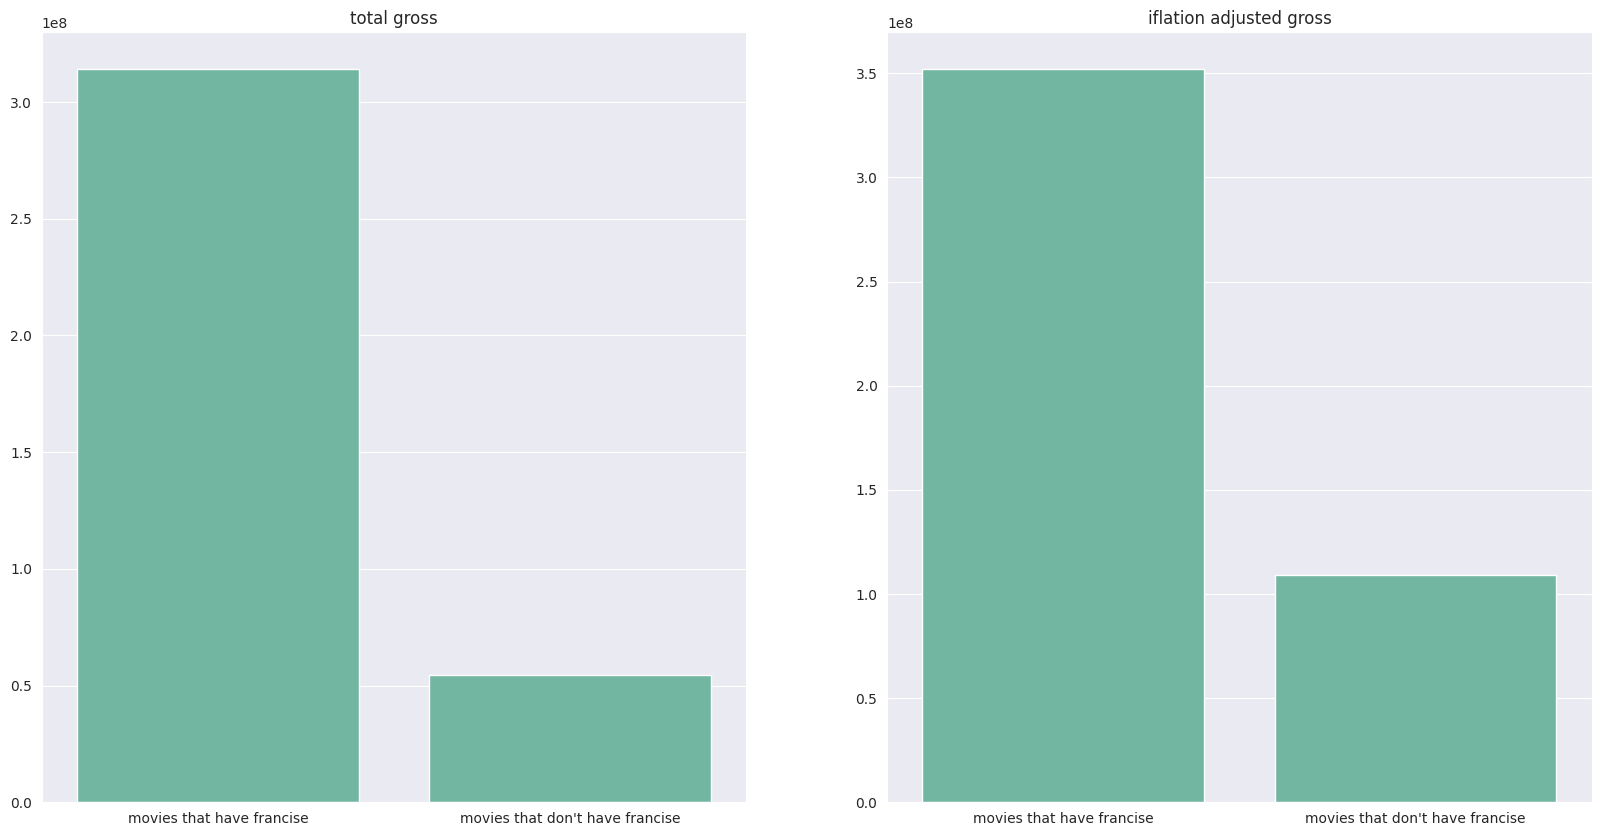

In [37]:
fig, ax= plt.subplots(1,2,figsize=(20,10))
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['total_gross'])/len(df[df['movie_francise'] !='None']['total_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['total_gross'])/len(df[df['movie_francise'] =='None']['total_gross']))
x=["movies that have francise","movies that don't have francise"]
fig1 = sns.barplot(x=x,y=y,ax=ax[0])
fig1.set_title('total gross')
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] !='None']['inflation_adjusted_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] =='None']['inflation_adjusted_gross']))
x=["movies that have francise","movies that don't have francise"]
fig2 = sns.barplot(x=x,y=y,ax=ax[1])
fig2.set_title('iflation adjusted gross')
plt.show()



> 📌 Las películas de franquicias generan significativamente más ingresos, incluso ajustados por inflación, consolidándose como el principal motor financiero de Disney.



<ipython-input-39-8377af5cd4f7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




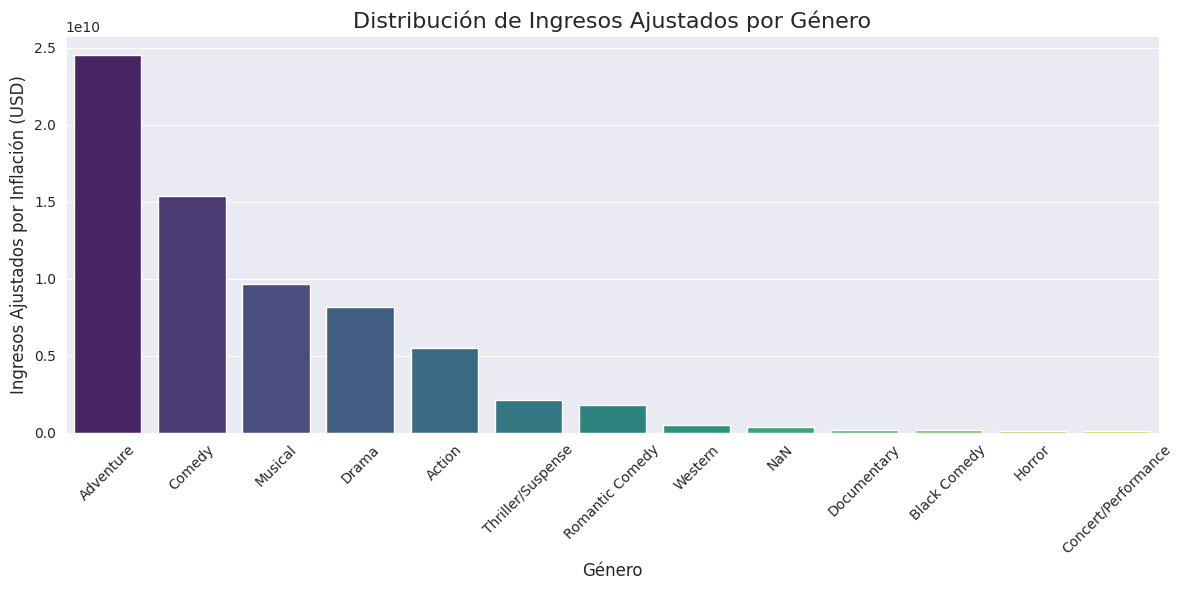

In [39]:
genre_gross = df.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')
plt.title('Distribución de Ingresos Ajustados por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingresos Ajustados por Inflación (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



>

📌 Aventura lidera ampliamente: El género de aventura es el que más ingresos ha generado ajustados por inflación, mostrando su gran popularidad a lo largo del tiempo.

📌 Comedia en segundo lugar: La comedia ocupa el segundo puesto, destacando su atractivo continuo para audiencias de todas las edades.

📌 Musicales y dramas destacados en el pasado: Estos géneros tienen una buena recaudación, probablemente impulsada por clásicos de Disney.

📌 Géneros como thriller y acción muestran potencial: Aunque no lideran, tienen un aporte significativo en ingresos.



<ipython-input-40-a37c7827e5b2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




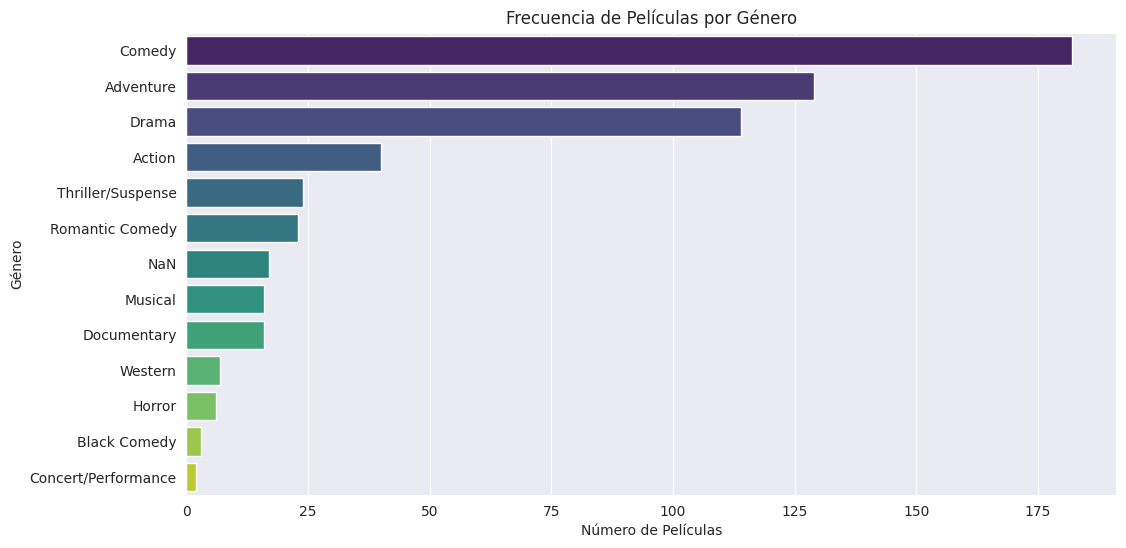

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Frecuencia de Películas por Género')
plt.xlabel('Número de Películas')
plt.ylabel('Género')
plt.show()


📌 Observaciones de la gráfica:

Comedia lidera en frecuencia: El género "Comedy" es el más producido, superando a otros géneros con más de 175 películas.

Aventura y Drama: Los géneros "Adventure" y "Drama" también tienen una producción significativa, ocupando el segundo y tercer lugar.

Géneros poco frecuentes: Géneros como "Concert/Performance" y "Black Comedy" tienen una producción casi insignificante en comparación con los demás.

Incremento de géneros modernos: Géneros como "Action" y "Thriller/Suspense" reflejan una tendencia moderna en la industria.

Presencia de valores faltantes: Hay un número considerable de películas con géneros no especificados (NaN).

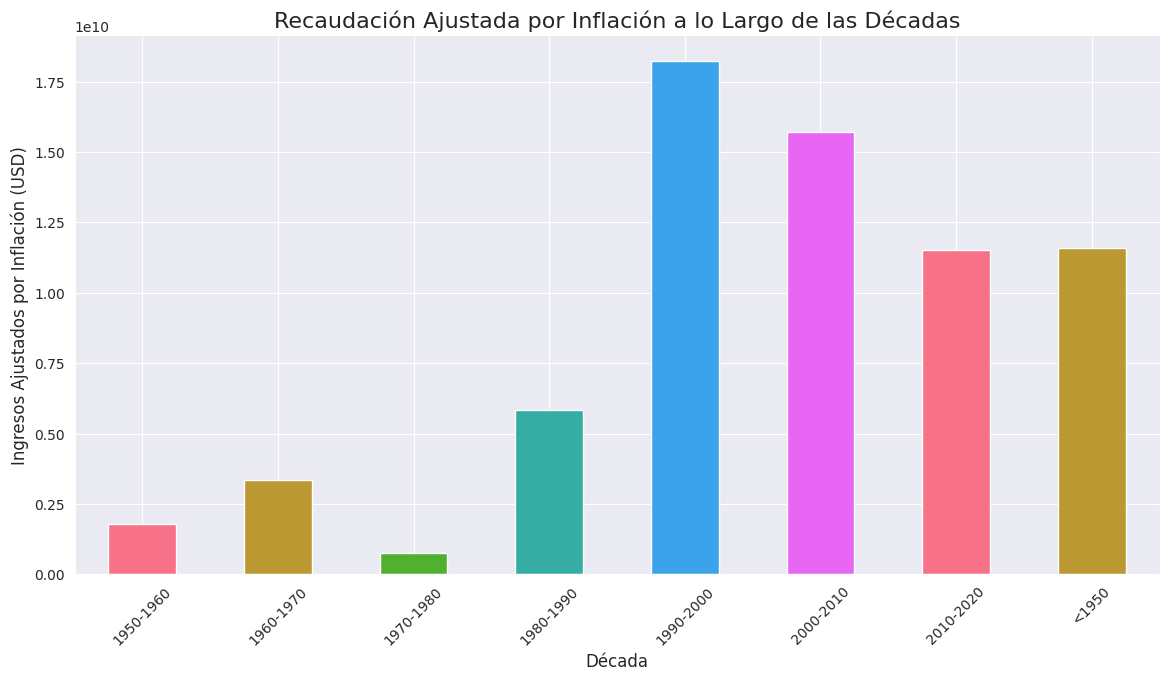

In [41]:
sns.set_palette("husl")
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
df.groupby('decade')['inflation_adjusted_gross'].sum().sort_index().plot(kind='bar', color=sns.color_palette("husl"))
plt.title("Recaudación Ajustada por Inflación a lo Largo de las Décadas", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Ingresos Ajustados por Inflación (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

📌 Observaciones de la gráfica:

Incremento significativo a partir de los años 1990-2000: La recaudación ajustada por inflación muestra un aumento significativo a partir de esta década, destacándose como la más lucrativa.

El impacto de las décadas más recientes: Aunque 2000-2010 mantiene un alto nivel de ingresos, las décadas 2010-2020 y <1950 también muestran resultados sólidos.

Auge de películas clásicas: La década anterior a 1950 sigue teniendo una fuerte presencia gracias a las películas clásicas, cuyo valor se amplificó al ajustarse por inflación.

Fluctuaciones en las décadas de 1960-1980: Las décadas de 1960 a 1980 presentan ingresos más modestos en comparación con las demás.

Dominio de producciones modernas: A partir de 1990, los ingresos reflejan la transición de Disney hacia producciones de mayor presupuesto y franquicias.

<ipython-input-42-f669ccf0c511>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




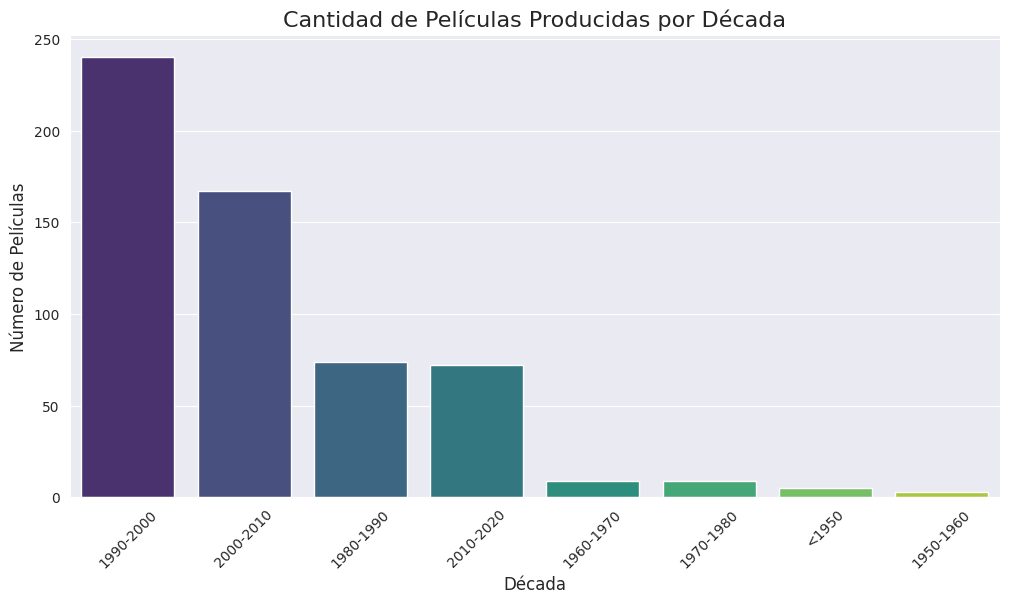

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='decade', palette='viridis', order=df['decade'].value_counts().index)
plt.title('Cantidad de Películas Producidas por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**📌 Observaciones sobre la gráfica de cantidad de películas producidas por década:**

📌 La década de 1990-2000 destaca como la más prolífica en términos de producción, con más de 200 películas lanzadas.

📌 La década de 2000-2010 también muestra una alta actividad, ocupando el segundo lugar en cantidad de películas producidas.

📌 Entre 1980 y 1990, la producción de películas experimentó un notable aumento comparado con décadas anteriores.

📌 Décadas más tempranas como 1950-1960 y <1950 muestran un número significativamente menor de películas, reflejando un inicio modesto en la industria.

📌 A partir de 1980, se observa un crecimiento constante en la cantidad de películas producidas por Disney.

📌 Las décadas de 1960-1970 y 1970-1980 tienen números bajos de producción, probablemente por cambios en la estrategia de mercado.

<ipython-input-47-997df5ed636d>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-47-997df5ed636d>:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



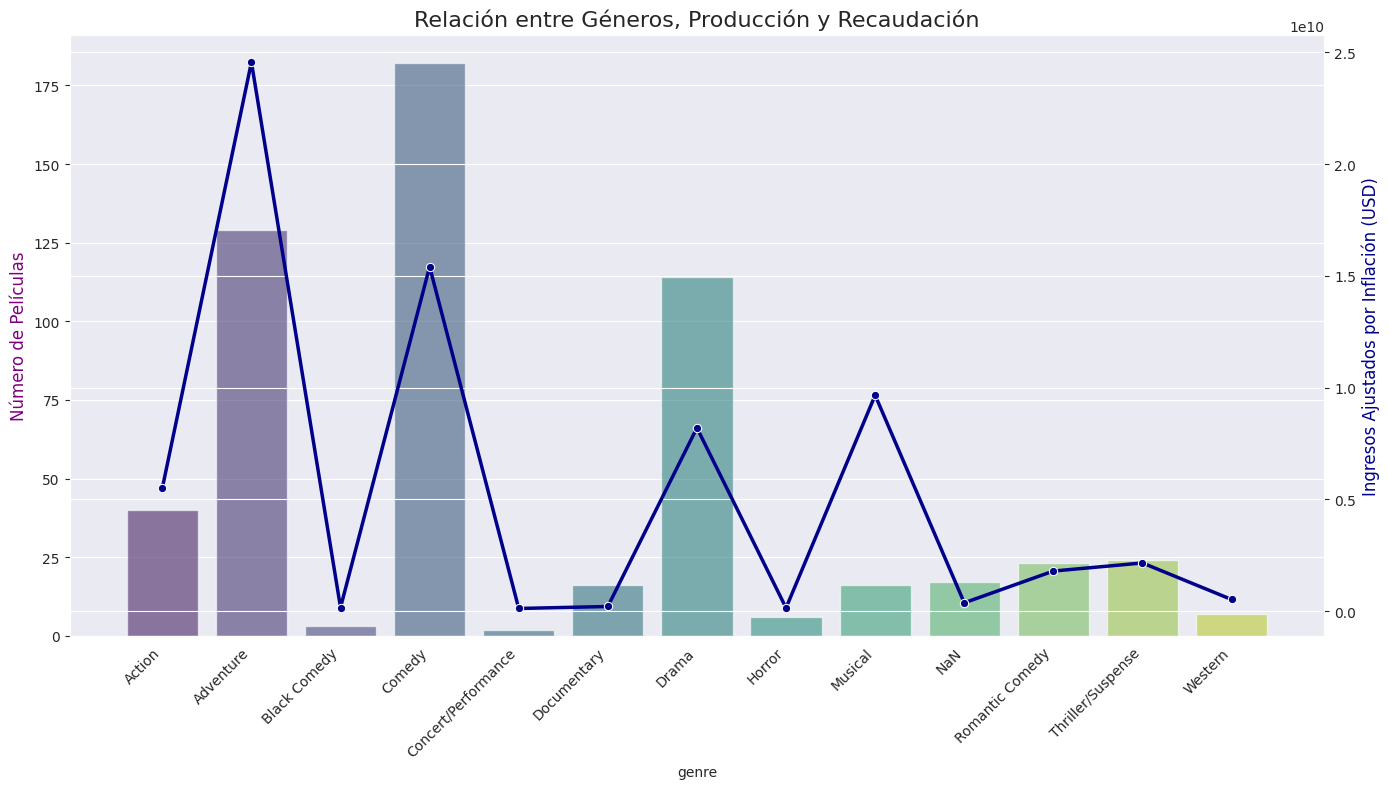

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
genre_data = df.groupby('genre').agg({
    'inflation_adjusted_gross': 'sum',
    'movie_title': 'count'
}).reset_index()
genre_data = genre_data.rename(columns={'inflation_adjusted_gross': 'Total Ingresos Ajustados', 'movie_title': 'Número de Películas'})
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(
    x='genre',
    y='Número de Películas',
    data=genre_data,
    palette='viridis',
    alpha=0.6,
    ax=ax1
)
ax1.set_ylabel('Número de Películas', fontsize=12, color='purple')
ax1.set_title('Relación entre Géneros, Producción y Recaudación', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax2 = ax1.twinx()
sns.lineplot(
    x='genre',
    y='Total Ingresos Ajustados',
    data=genre_data,
    sort=False,
    marker='o',
    color='darkblue',
    linewidth=2.5,
    ax=ax2
)
ax2.set_ylabel('Ingresos Ajustados por Inflación (USD)', fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

📌 Comedia es el género con mayor frecuencia de películas producidas, pero no lidera en ingresos ajustados por inflación.

📌 Aventura sobresale como el género con los mayores ingresos ajustados, destacándose a pesar de no ser el más producido.

📌 Géneros como Black Comedy y Concert/Performance tienen una producción baja y generan ingresos mínimos.

📌 Drama tiene una producción alta, pero sus ingresos no alcanzan los niveles de géneros como Aventura y Acción.

📌 Géneros como Acción y Thriller/Suspense muestran una proporción más equilibrada entre frecuencia y recaudación.

Mean Squared Error (MSE): 9.315705763659373e+16
R² Score: 0.5153152875991626


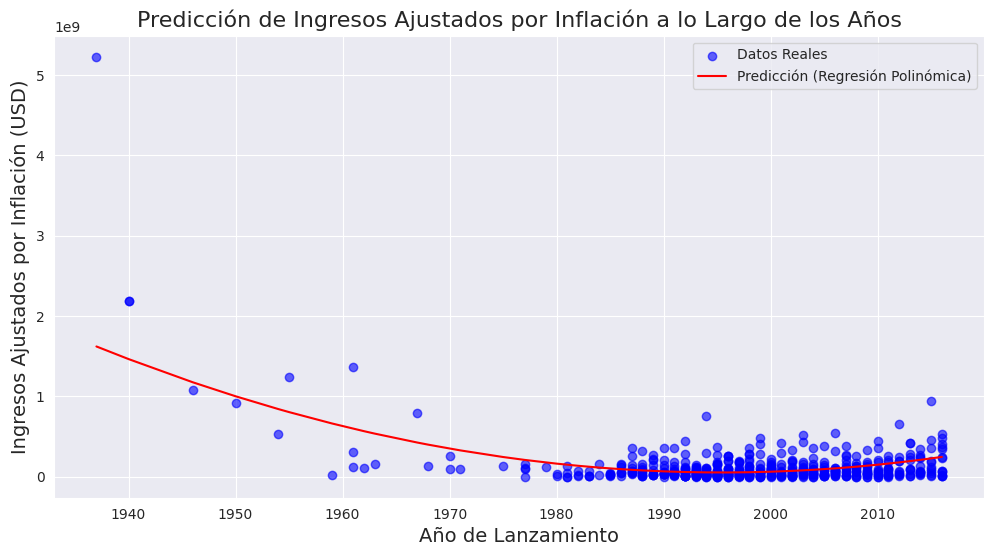

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df_filtered = df.dropna(subset=['inflation_adjusted_gross', 'release_date'])
df_filtered['year'] = df_filtered['release_date'].dt.year
X = df_filtered[['year']].values
y = df_filtered['inflation_adjusted_gross'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label="Datos Reales")
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', label="Predicción (Regresión Polinómica)")
plt.title("Predicción de Ingresos Ajustados por Inflación a lo Largo de los Años", fontsize=16)
plt.xlabel("Año de Lanzamiento", fontsize=14)
plt.ylabel("Ingresos Ajustados por Inflación (USD)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Observaciones 📌**

📉 Tendencia decreciente en los ingresos ajustados por inflación:

Los ingresos ajustados por inflación tienden a disminuir para las películas más antiguas a medida que avanzan las décadas, especialmente antes de 1980.

📈 Incremento en la dispersión desde 1990:

A partir de los años 1990, aunque el modelo predice ingresos más bajos en promedio, hay una mayor variación, con algunas películas obteniendo ingresos significativamente altos.

🔍 Relación no lineal capturada:

El modelo de regresión polinómica captura una relación no lineal que explica cómo las películas más recientes se desvían del patrón decreciente.

🎥 Impacto de películas antiguas icónicas:

Las películas de antes de 1950, como "Snow White", destacan con ingresos excepcionalmente altos incluso después de ajustar por inflación, elevando la curva inicial.

📊 Limitación del modelo:

Aunque el modelo captura bien la tendencia general, la dispersión en los datos recientes sugiere que factores adicionales como género, presencia de franquicias y estrategias de marketing influyen significativamente en los ingresos.

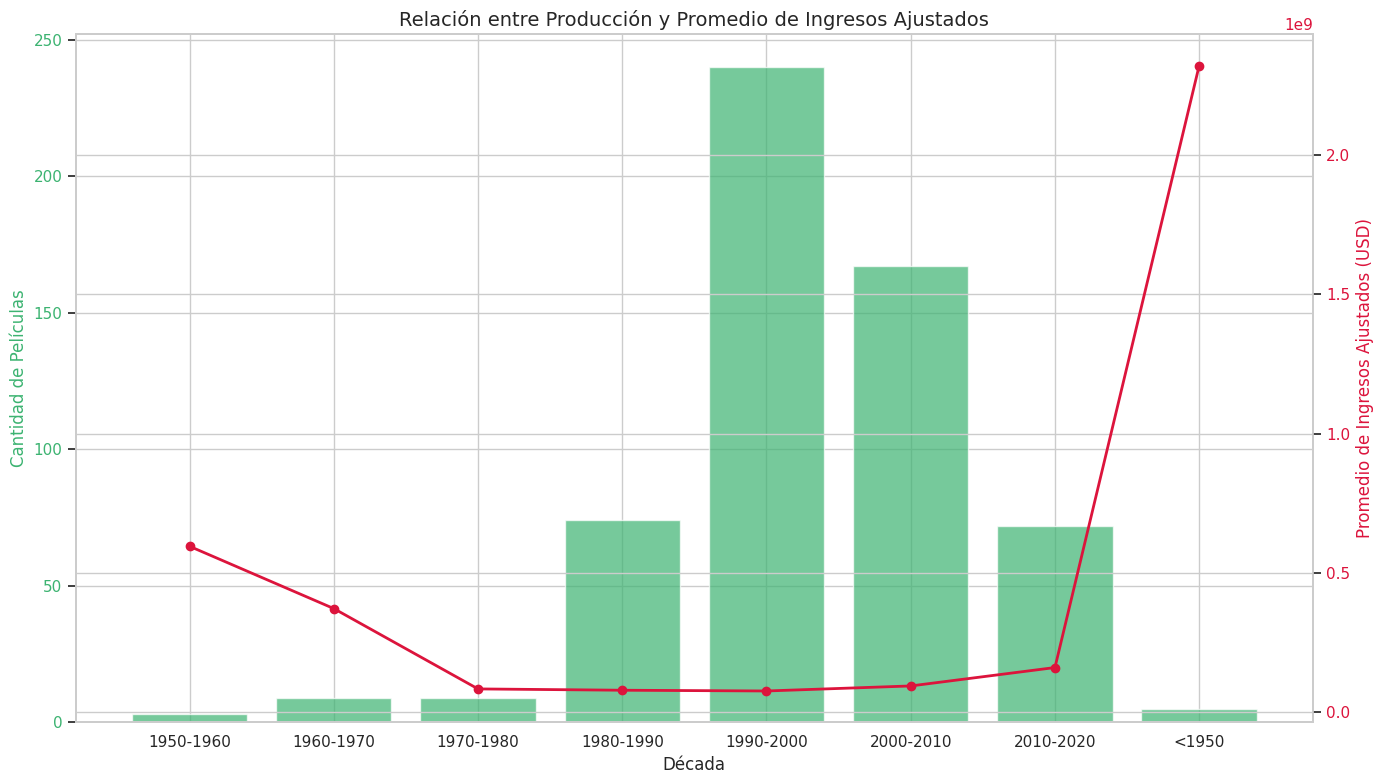

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos necesarios
decade_summary = df.groupby('decade').agg(
    {'movie_title': 'count', 'inflation_adjusted_gross': 'mean'}
).rename(columns={'movie_title': 'movie_count', 'inflation_adjusted_gross': 'avg_gross'}).reset_index()

# Configuración de estilo
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras: cantidad de películas
color_bar = 'mediumseagreen'
ax1.bar(decade_summary['decade'], decade_summary['movie_count'], color=color_bar, alpha=0.7)
ax1.set_ylabel('Cantidad de Películas', fontsize=12, color=color_bar)
ax1.set_xlabel('Década', fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_title('Relación entre Producción y Promedio de Ingresos Ajustados', fontsize=14)

# Eje secundario: promedio de ingresos ajustados
ax2 = ax1.twinx()
color_line = 'crimson'
ax2.plot(decade_summary['decade'], decade_summary['avg_gross'], color=color_line, marker='o', linewidth=2)
ax2.set_ylabel('Promedio de Ingresos Ajustados (USD)', fontsize=12, color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# Mejorar el diseño
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


Conclusiones Generales del Análisis:

📌 Incremento en la cantidad de películas producidas en décadas recientes: Se observa que a partir de 1990 la cantidad de películas lanzadas por Disney creció significativamente, reflejando una estrategia más agresiva en producción cinematográfica.

📌 Diversificación de géneros a lo largo del tiempo: Las primeras décadas estuvieron dominadas por musicales y dramas, mientras que en las últimas décadas géneros como acción y aventura han ganado popularidad, generando mayores ingresos.

📌 Ingresos ajustados por inflación destacan las películas clásicas: Películas icónicas como Blancanieves y los Siete Enanitos tienen ingresos ajustados sobresalientes, superando a películas modernas en términos relativos.

📌 Franquicias generan ingresos significativamente más altos: Las películas asociadas a franquicias como Marvel y Star Wars muestran una clara ventaja tanto en ingresos brutos como ajustados por inflación en comparación con películas independientes.

📌 Promedio de ingresos altos en décadas tempranas: Aunque se producían pocas películas en décadas como 1950-1960, estas lograban un promedio de ingresos ajustados por inflación mucho mayor, probablemente debido al impacto cultural y la falta de competencia.

📌 Tendencia decreciente en ingresos ajustados promedio: En décadas recientes, aunque la cantidad de películas ha aumentado, el promedio de ingresos ajustados por película ha disminuido, lo que sugiere una saturación del mercado.

📌 Éxitos contemporáneos dominan en números absolutos: A pesar del impacto histórico de películas clásicas, éxitos modernos como los de Avengers y Frozen han dominado en ingresos absolutos, impulsados por estrategias de marketing global y lanzamientos simultáneos.

Estas conclusiones reflejan cómo Disney ha evolucionado estratégicamente en términos de producción, diversificación de géneros y capitalización de franquicias, adaptándose a un mercado cinematográfico en constante cambio.